HOMEWORK 1

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("Hitters.csv")

In [7]:
df = df[df['Salary'].notna()]
df = df.select_dtypes(['number'])

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


/Users/MacKiwi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal penalty: 3.3746790783918175
12 features are selected
Those features are ['AtBat', 'Hits', 'RBI', 'Walks', 'Years', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


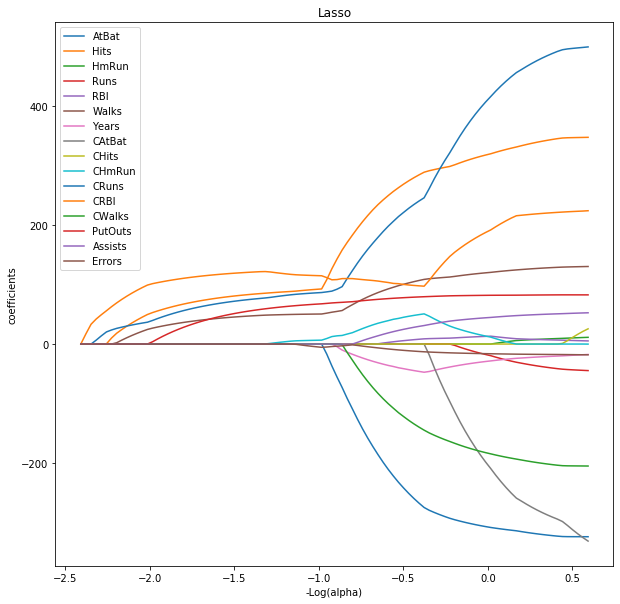

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['Salary'],axis=1).values)
Y = df['Salary'].values
features = list(df.drop(['Salary'],axis=1).columns)

lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X,Y)
log_lasso_alphas = -np.log10(lasso_alphas)

plt.figure(1,figsize=(10,10))
for c,f in zip(lasso_coefs, features):  
    f1 = plt.plot(log_lasso_alphas,c,label = f)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.legend()
plt.title('Lasso')
lasso_model = linear_model.LassoCV().fit(X,Y)

print("Optimal penalty:", lasso_model.alpha_)

selected_features = []
for i in range(len(lasso_model.coef_)):
    if lasso_model.coef_[i] != 0:
        selected_features.append(features[i])
print(len(selected_features),"features are selected")
print("Those features are", selected_features)

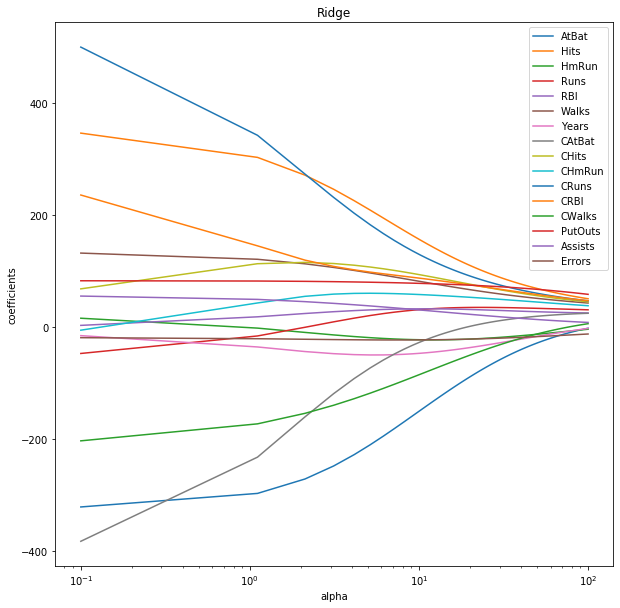

Optimal penalty: 3.1272727272727274
10 features are selected


In [26]:
alphas = np.linspace(0.1, 100, 100)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
plt.figure(2,figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge')
plt.legend(features)
plt.show()

ridge_model = linear_model.RidgeCV(alphas).fit(X,Y)

print("Optimal penalty:", ridge_model.alpha_)

selected_features = []
for i in range(len(ridge_model.coef_)):
    if ridge_model.coef_[i] >= 0:
        selected_features.append(features[i])
print(len(selected_features),"features are selected")

Bias variance tradeoff is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples. In general, the regularization will help to prevent data overfiiting. Regularization would reduce the variance of the model, without a substantial increase in its bias. Considering the prior problem, given a set of regularization coefficient, the models perform the best when the coefficient is large, meaning the models are penalized for being too complex, and they have high bias and low variance.